# Speasy - Space Physics made EASY

- Pypi     : https://pypi.org/project/speasy 
- Github        : https://github.com/SciQLop/speasy
- Documentation : https://speasy.readthedocs.io/en/stable/index.html

Current release: 0.10.1

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

## Installation

`pip install speasy`

# Import dependencies
When importing the module for the first time in a script `speasy` will retrieve the description of each product provided by the supported data providers (AMDA, SSCWeb, and more to come).

In [2]:
import os
import matplotlib.pyplot as plt
from datetime import datetime
import time

from speasy import config
config.cache_path.set("./cache")

import speasy as spz

In [3]:
print(f"speasy version: {spz.__version__}")

speasy version: 0.10.1


# Local cache settings

By default speasy stores requests results on user's disk, to get current cache location use:

In [4]:
spz.config.cache_path.get()

'./cache'

You can also get current cache max size with (default: 20e9):

In [5]:
spz.config.cache_size.get()

'20e9'

When the cache size limit is exceeded `speasy` will drop the oldest datasets.

Cache path and cache size can be changed/set with:

In [6]:
#spz.config.cache_path.set('./cache')
spz.config.cache_size.set('20e9')
print(f"New cache path : {spz.config.cache_path.get()}")
print(f"New cache size : {spz.config.cache_size.get()}")

New cache path : ./cache
New cache size : 20e9


Warning : `speasy`'s configuration file is located in the users home directory under `~/.config/speasy/config.ini` (on Linux). This file is shared by all instances of `speasy` executed by the user. 

When encountering cache errors, the easiest solution is to delete the `~/.cache/speasy` directory.

# Get data from AMDA

When the cache is empty `speasy` will query the provider for the data and store it. This can take some time for large datasets.

Let's compare the time required to download data from AMDA with and without the cache.

In [7]:
# start, stop and parameter ids
start_time = "2021-10-28T12:00:00"
stop_time = "2021-10-29T12:00:00"
param_ids = ["amda/sta_het_1min_efl", 
             "amda/sta_het_1min_hfl", 
             ]

Caching is activated by default, to disable it pass the `disable_cache=True` argument to the `get_data` function.

In [8]:
t0 = time.time()
params_data = {}
for param_id in param_ids:
    params_data[param_id] = spz.get_data(param_id, 
                                         start_time=start_time, 
                                         stop_time=stop_time, 
                                         disable_cache=True)
    
print(f"Without cache: {time.time() - t0}")

Without cache: 4.318450927734375


In [9]:
t0 = time.time()
params_data = {}
for param_id in param_ids:
    params_data[param_id] = spz.get_data(param_id, 
                                         start_time=start_time, 
                                         stop_time=stop_time)
    
print(f"With cache: {time.time() - t0}")

With cache: 0.02933359146118164


`get_data` may return one of the following objects : 
  - `SpeasyVariable` for single parameters
  - `Dataset` for datasets (collection of `SpeasyVariable`s)
  - `Timetable` for timetables
  - `Catalog` for catalogs

In [10]:
type(params_data[param_ids[0]])

speasy.products.variable.SpeasyVariable

Get `pandas` DataFrame : 

In [11]:
params_data[param_ids[0]].to_dataframe()

,sta_het_1min_efl[0],sta_het_1min_efl[1],sta_het_1min_efl[2]
1.635422e+09,0.0000,0.0197,0.023
1.635422e+09,0.0000,0.0000,0.000
1.635423e+09,0.0000,0.0000,0.000
1.635423e+09,0.0000,0.0197,0.023
1.635423e+09,0.0394,0.0000,0.000
...,...,...,...
1.635508e+09,11.0000,6.5200,1.700
1.635509e+09,10.8000,5.2700,1.680
1.635509e+09,11.0000,5.4100,1.630
1.635509e+09,11.0000,5.2100,1.850


# Quick data visualization

`SpeasyVariable` objects can be quickly plotted through their `plot` method.

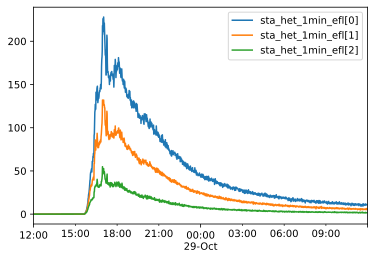

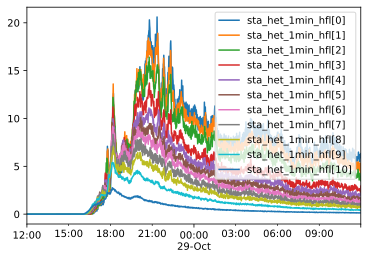

In [12]:
for param in params_data.values():
    param.plot()

# Data manipulation
`SpeasyVariable` objects have three main attributes:
  - `time` a numpy array containing UTC time in seconds
  - `data` a numpy array containing the parameter data
  - `meta` a dictionary containing parameter metadata

In [13]:
p = list(params_data.values())[0]
p.time

array([1.63542240e+09, 1.63542246e+09, 1.63542252e+09, ...,
       1.63550862e+09, 1.63550868e+09, 1.63550874e+09])

Parameter data : 

In [14]:
p.data

array([[ 0.    ,  0.0197,  0.023 ],
       [ 0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       ...,
       [11.    ,  5.41  ,  1.63  ],
       [11.    ,  5.21  ,  1.85  ],
       [11.    ,  5.87  ,  1.83  ]])

Parameter metadata : 

In [15]:
for key, value in p.meta.items():
    print(f"{key}: {value}")

AMDA INFO: 
AMDA_ABOUT: Created by AMDA
AMDA_VERSION: 3.6.2
AMDA_ACKNOWLEDGEMENT: CDPP/AMDA Team
REQUEST INFO: 
REQUEST_STRUCTURE: one-file-per-parameter-per-interval
REQUEST_TIME_FORMAT: Seconds from 1970, milliseconds
REQUEST_OUTPUT_PARAMS: sta_het_1min_efl
BASE PARAMETERS: 
MISSION_ID: STEREO-A
MISSION_NAME: STEREO A
MISSION_DESCRIPTION: STEREO Ahead
MISSION_URL: http://stereo.gsfc.nasa.gov/
INSTRUMENT_ID: STEREO-A_het
INSTRUMENT_NAME: HET
INSTRUMENT_DESCRIPTION: High Energy Telescope
INSTRUMENT_PI: spase://SMWG/Person/Janet.G.Luhmann
INSTRUMENT_TYPE: ParticleDetector
DATASET_ID: sta-het-1min
DATASET_NAME: 1 minute
DATASET_DESCRIPTION: electrons and protons flux 1 minute rate
DATASET_SOURCE: CDPP/DDServer
DATASET_GLOBAL_START: 2006-12-01T00:00:00.000
DATASET_GLOBAL_STOP: 2022-05-09T06:44:00.000
DATASET_MIN_SAMPLING: 60
DATASET_MAX_SAMPLING: 60
PARAMETER_ID: sta_het_1min_efl
PARAMETER_NAME: sta_het_1min_efl
PARAMETER_SHORT_NAME: e- flux
PARAMETER_COMPONENTS: 0.7-1.4 MeV,1.4-2.8 MeV,2

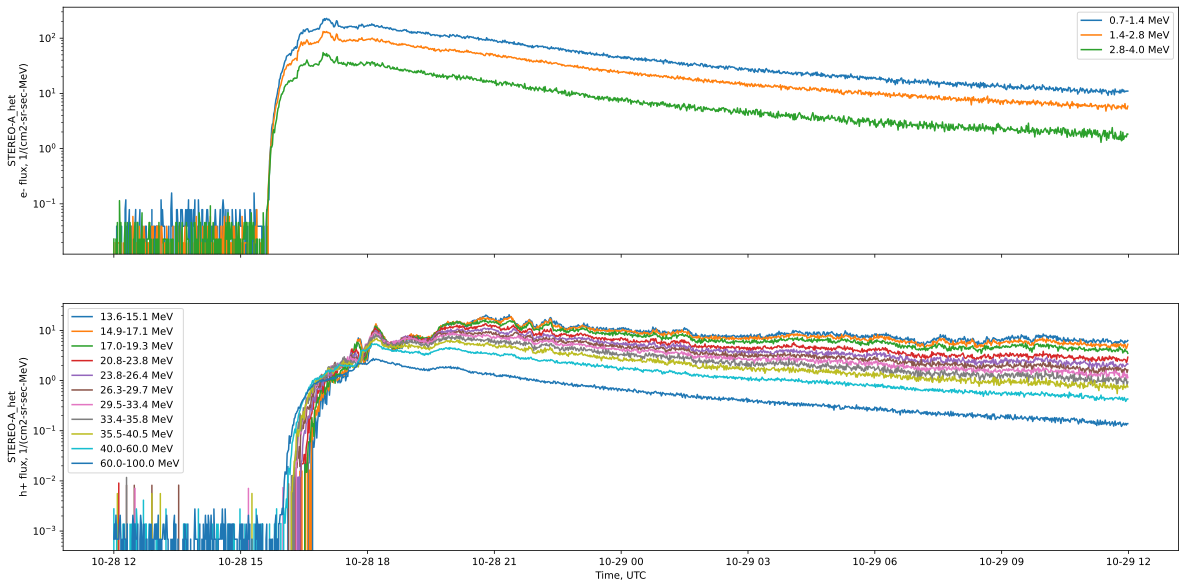

In [16]:
fig, axes = plt.subplots(len(param_ids), 1, sharex=True, figsize=(20,10))

for param_index in range(len(param_ids)):
    param_id = param_ids[param_index]
    param_data = params_data[param_id]
    times=[datetime.utcfromtimestamp(t) for t in param_data.time]
    if 'PARAMETER_COMPONENTS' in param_data.meta:
        components = param_data.meta['PARAMETER_COMPONENTS'].split(',')
    else:
        components = None
    for component_index in range(param_data.data.shape[1]):
        if components:
            label=components[component_index]
        else:
            label=None
        axes[param_index].plot(times, param_data.data[:,component_index], label=label)
    if components:
        axes[param_index].legend(components)
    axes[param_index].set_yscale('log')
    axes[param_index].set_ylabel('{}\n{}, {}'.format(param_data.meta['INSTRUMENT_ID'], param_data.meta['PARAMETER_SHORT_NAME'], param_data.meta['PARAMETER_UNITS']))

plt.xlabel("Time, UTC")
plt.show()

## Datasets
Lets download the dataset that contains the previously downloaded parameters.

In [17]:
dataset_id = f"amda/{p.meta['DATASET_ID']}"
dataset = spz.get_data(dataset_id, start_time, stop_time)
type(dataset)

speasy.products.dataset.Dataset

Access the variable data using the `variables` attribute which is a dictionary indexed by the parameter ids.

In [18]:
dataset.variables

{'e- flux': <speasy.products.variable.SpeasyVariable at 0x7f4f18177950>,
 'e- flux uncertainty': <speasy.products.variable.SpeasyVariable at 0x7f4f1817b720>,
 'h+ flux': <speasy.products.variable.SpeasyVariable at 0x7f4f18188d10>,
 'h+ flux uncertainty': <speasy.products.variable.SpeasyVariable at 0x7f4f181934f0>}

## Timetable
`TimeTable` are list-like objects, items are `DateTimeRange` objects that represent time intervals. You can access the start and stop times with the `start_time` and `stop_time` attributes.

The `start_time` and `stop_time` arguments are ignored when downloading time-tables and catalogs.

In [19]:
tt = spz.get_data("amda/sharedtimeTable_0")
type(tt)

speasy.products.timetable.TimeTable

List like object : 

In [20]:
len(tt)

782

Items at `DateTimeRange` objects.

In [21]:
type(tt[0])

speasy.core.datetime_range.DateTimeRange

In [22]:
print(f"Start: {tt[0].start_time}")
print(f"Stop : {tt[0].stop_time}")

Start: 2001-02-02 16:39:57+00:00
Stop : 2001-02-02 16:39:58+00:00


## Catalog
Similarly to `TimeTable` objects `Catalog`s are list-like objects. Items are `Event` objects that are `DateTimeRange` objects with an additional attribute `meta`.

In [23]:
catalog_id = "amda/sharedcatalog_22"
cat = spz.get_data(catalog_id)
cat

<Catalog: model_regions_plasmas_mms_2019>

In [24]:
len(cat)

12691

In [25]:
item = cat[0]
type(item)

speasy.products.catalog.Event

In [26]:
print(item.start_time, item.stop_time, item.meta)

2019-01-01 00:00:04+00:00 2019-01-01 00:24:04+00:00 {'classes': '0'}


# Get data from CDAWeb

<AxesSubplot:>

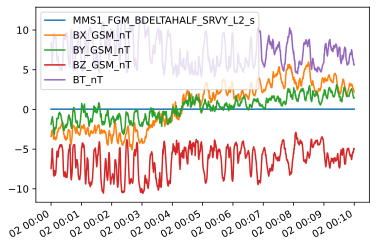

In [27]:
mms1_mag = spz.get_data('cdaweb/MMS1_FGM_SRVY_L2/mms1_fgm_b_gsm_srvy_l2_clean', 
                         datetime(2019,6,2), datetime(2019,6,2,0,10))
mms1_mag.plot()

# Get data from SSCWeb

<AxesSubplot:>

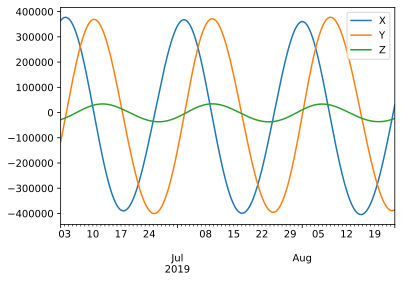

In [28]:
moon_orbit = spz.get_data('sscweb/moon', 
                         datetime(2019,6,2), datetime(2019,8,24))
moon_orbit.plot()

# Inventory

`speasy` constructs an inventory of all the products available. These products are available through the `speasy.inventory.data_tree` submodule. 

In [29]:
indx = spz.inventory.data_tree.amda.TimeTables.SharedTimeTables.EARTH.Event_list_tail_hall_reconnection_SC1
indx

<TimetableIndex: Event_list_tail_hall_reconnection_SC1>

You can pass a `ParameterIndex`, `DatasetIndex`, `TimetableIndex`, `CatalogIndex` object to `get_data`.

In [30]:
spz.get_data(indx, start_time, stop_time)

<TimeTable: Event_list_tail_hall_reconnection_SC1>